In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\Shravani Kulkarni\OneDrive\Desktop\Stack\Python\Project\College Admissionn Prediction Dataset - Copy.csv")
data

,Year,Marks10th,Marks12th,Division12th,AIEEE_Rank,College
0,2015,95,92,2,100,IIT delhi
1,2015,75,88,3,1023,VIT vellore
2,2015,83,84,6,2935,Ahemedabad IT
3,2015,75,91,8,5647,University college of ENGG
4,2015,94,94,9,3564,SRMIST chennai
...,...,...,...,...,...,...
1007,2019,89,81,3,4523,IIT jodhpur
1008,2019,93,88,1,5511,BIT Mesra
1009,2019,86,93,1,100,IIT Bombay
1010,2019,85,89,9,515,IIT hydrabad


In [3]:
from sklearn.preprocessing import LabelEncoder # using label encoder for transforming string into labels
label = LabelEncoder()
data["College"] = label.fit_transform(data['College'])
data.head()

,Year,Marks10th,Marks12th,Division12th,AIEEE_Rank,College
0,2015,95,92,2,100,10
1,2015,75,88,3,1023,38
2,2015,83,84,6,2935,0
3,2015,75,91,8,5647,37
4,2015,94,94,9,3564,35


In [4]:
in_variable = ['Marks10th','Marks12th','AIEEE_Rank']
x = data[in_variable] #x variables which are independent
y = data['College'] #y variables which are dependent

In [5]:
from sklearn.model_selection import cross_val_score, KFold # for KFold validation technique
from sklearn.svm import SVC #importing SVM algo
from sklearn.ensemble import RandomForestClassifier #random forest algo
from sklearn.tree import DecisionTreeClassifier # decision tree algo

In [6]:
SVM           = SVC()
rf_classifier = RandomForestClassifier()
dt_classifier = DecisionTreeClassifier()

In [7]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42) #applying KFold technique

In [8]:
cross_val_scores_svm = cross_val_score(SVM, x, y, cv=kfold) #storing the scores in var
print("Cross-Validation Scores:", cross_val_scores_svm)

Cross-Validation Scores: [0.18627451 0.19607843 0.18811881 0.14851485 0.26732673 0.26732673
 0.13861386 0.23762376 0.20792079 0.20792079]


In [9]:
#0.18627451 0.19607843 0.18811881 0.14851485 0.26732673 0.26732673
 #0.13861386 0.23762376 0.20792079 0.20792079]

In [10]:
cross_val_scores_rf = cross_val_score(rf_classifier, x, y, cv=kfold)
print("Cross-Validation Scores:", cross_val_scores_rf)

Cross-Validation Scores: [0.92156863 0.95098039 0.9009901  0.9009901  0.93069307 0.92079208
 0.92079208 0.9009901  0.9009901  0.92079208]


In [11]:
cross_val_scores_dt = cross_val_score(dt_classifier, x, y, cv=kfold)
print("Cross-Validation Scores:", cross_val_scores_dt)

Cross-Validation Scores: [0.90196078 0.94117647 0.91089109 0.9009901  0.97029703 0.91089109
 0.91089109 0.89108911 0.94059406 0.94059406]


In [12]:
print("Mean Accuracy of SVM :", np.mean(cross_val_scores_svm))

Mean Accuracy of SVM : 0.2045719277810134


In [13]:
print("Mean Accuracy of Random Forest :", np.mean(cross_val_scores_rf))

Mean Accuracy of Random Forest : 0.9169578722578141


In [14]:
print("Mean Accuracy of Decision Tree :", np.mean(cross_val_scores_dt))

Mean Accuracy of Decision Tree : 0.9219374878664338


In [15]:
from sklearn.model_selection import train_test_split # splliting data for training and testing

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2) #assigning training,testing data for x and y

In [16]:
dt_classifier.fit(x_train,y_train) # training model

DecisionTreeClassifier()

In [17]:
dt_classifier.predict(x_test) # ready for prediction

array([32,  1,  5,  3, 28,  0, 29, 23, 37, 15, 31, 18,  0, 15,  2,  0,  4,
       10, 21, 20, 27, 17, 17, 33, 11,  5,  0,  3, 34, 16,  7,  6, 36, 34,
       17, 14, 32, 26, 24,  5, 26, 31, 33, 29, 24, 19,  0, 35, 14, 23,  7,
       14, 20,  5, 15, 20, 28, 26,  6, 34, 14,  2, 20,  8, 24, 36,  6, 16,
       28,  5, 11, 26, 20, 34,  3,  0, 20, 25, 34,  0, 37, 15, 25,  0, 33,
       31, 19, 25, 36, 32,  0, 26, 38,  4,  0, 38, 28, 20, 31, 16, 24, 17,
       35, 37, 34, 36, 16, 25, 36, 26, 14, 33, 24, 20, 24, 22, 16, 36, 32,
       34, 28, 35,  9, 20, 34, 34, 24, 37, 22, 14,  7, 24,  5, 31, 10,  5,
       31, 35, 31, 27, 25, 38, 22,  9, 21, 25, 14,  9, 31,  5,  3, 17, 13,
       16,  9, 24, 14, 11,  0, 38, 36,  0, 14, 17, 34, 26,  0, 38, 26, 12,
        0, 13, 20,  4, 34, 16, 13, 34, 34, 37, 26, 27,  6, 28, 35, 28,  1,
       17,  3, 31, 33, 15,  9, 27, 17, 13, 38,  9, 29, 21, 37,  1, 20])

[Text(0.4855410447761194, 0.96875, 'X[2] <= 3070.0\ngini = 0.97\nsamples = 809\nvalue = [35, 25, 12, 24, 13, 17, 24, 15, 19, 24, 15, 26\n17, 13, 21, 30, 36, 16, 14, 15, 39, 14, 10, 9\n21, 23, 20, 15, 35, 12, 13, 31, 10, 10, 36, 26\n38, 24, 12]'),
 Text(0.1777856407617087, 0.90625, 'X[2] <= 2562.5\ngini = 0.95\nsamples = 376\nvalue = [8, 0, 12, 0, 2, 17, 0, 15, 19, 0, 15, 17, 17\n13, 21, 0, 0, 16, 14, 15, 37, 14, 10, 9, 7, 0\n16, 0, 35, 12, 13, 0, 10, 0, 0, 0, 0, 0, 12]'),
 Text(0.06787184765826042, 0.84375, 'X[2] <= 146.0\ngini = 0.945\nsamples = 263\nvalue = [0, 0, 12, 0, 2, 0, 0, 15, 19, 0, 15, 10, 17\n13, 21, 0, 0, 16, 14, 15, 0, 14, 0, 9, 7, 0\n16, 0, 1, 12, 13, 0, 10, 0, 0, 0, 0, 0, 12]'),
 Text(0.032938754503345345, 0.78125, 'X[1] <= 93.5\ngini = 0.493\nsamples = 34\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 19, 0, 15, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.024704065877509007, 0.71875, 'X[0] <= 80.5\ngini = 0.236\nsamples = 22\nvalue

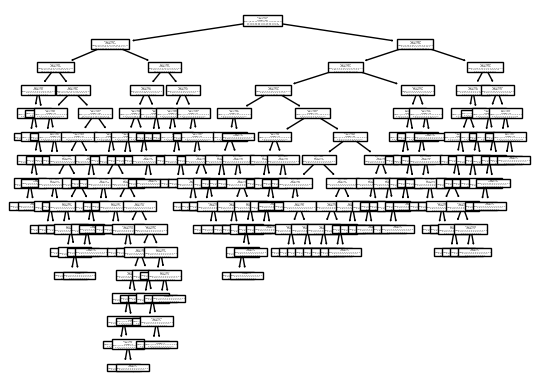

In [18]:
from sklearn import tree 
tree.plot_tree(dt_classifier)

In [19]:
rf_classifier.fit(x_train,y_train) 

RandomForestClassifier()

In [20]:
rf_classifier.predict(x_test)

array([32,  1,  5,  3, 28,  0, 29, 23, 37, 15, 31, 18,  0, 15,  2,  0,  4,
       10, 21, 20, 27, 17, 17, 33, 11,  5,  0,  3, 34, 16,  7,  6, 36, 34,
       17, 14,  7, 26, 15,  5, 26, 31, 33, 29, 24, 19,  0, 35, 14, 23, 13,
       14, 20,  5, 15, 20, 28, 26,  6, 34, 14,  2, 20,  8, 24, 36,  6, 16,
       28,  5, 11, 26, 20, 34,  3,  0, 20, 25, 34,  0,  6, 15, 25,  0, 33,
       31, 19,  1, 36, 32,  0, 26, 29,  4,  0, 38, 28, 20, 31, 16, 24, 17,
       35, 37, 34, 36, 16, 25, 36, 26, 14, 33, 24, 20, 24, 22, 16, 36, 32,
       34, 28, 35,  1, 20, 34, 34, 24, 37, 22, 14,  7, 24,  5, 31, 10,  5,
       31, 35, 31, 27, 25, 38, 22,  9, 21, 25, 14,  9, 31,  5,  3, 17, 13,
       16, 16, 24, 14, 11,  0, 38, 36,  0, 14,  8, 34, 26,  0, 38, 26, 12,
        0, 18, 20,  4, 34, 16, 13, 34, 34, 37, 26, 27,  6, 28, 35, 28,  1,
       10,  3, 31, 33, 15,  9, 27, 17, 13, 38,  9, 38, 21, 37,  1, 20])

In [21]:
rf_classifier.predict([[97,95,3]])

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([10])